# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


### Data Information

The dataset contains cases from a study that was conducted between
1958 and 1970 at the University of Chicago's Billings Hospital on
the survival of patients who had undergone surgery for breast
cancer.

**Attribute Information:**

1. age : Age of patient at time of operation (numerical)
2. operation_year : Patient's year of operation (year - 1900, numerical)
3. axil_nodes : Number of positive axillary nodes detected (numerical)
4. survival_status : Survival status (class attribute)
    - 1 = the patient survived 5 years or longer
    - 2 = the patient died within 5 year
    
y = survival_status

-------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline
# we can read the data directly from raw github link
# we are also defining the name of the columns.
#make sure that your csv file and ipynb notebook are in the same folder. If they are in different folder then you have to define the complete path
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"], header=0)
#df=pd.read_csv('haberman.csv',names=["age","year","nodes","status"])
#df = pd.read_csv('haberman.csv')
df.head()


,age,operation_Year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

### No of Data Points & Features

In [3]:
shape = df.shape
print('Total number of Points : ', shape[0])
print('Total number of Features : ', shape[1])

Total number of Points :  306
Total number of Features :  4


### No. of Classes

In [4]:
predicted_class = df['survival_status'].unique()
print('Predictable Class values ', predicted_class)
print('Total number of unique classes ', len(predicted_class))

Predictable Class values  [1 2]
Total number of unique classes  2


### No. of data points per classes 

In [5]:
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

> From Above figures it can be inferred that total number of people survived are more than double of non-survived


### 1.2 - Explain the objective of the problem.
The aim of analysis is to find out the relation or pattern that may delineates some hindsights which can be used for future patients or other field

In [6]:
lo = df['age'].min()
hi = df['age'].max()
lo, hi

# ages = np.arange(30,90,10)
# ages

(30, 83)

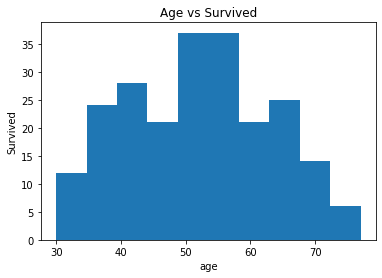

In [7]:
survived_age = df.loc[df['survival_status']==1]['age']

survived_age.plot(kind='hist', title="Age vs Survived")

plt.xlabel('age')
plt.ylabel('Survived')

#plt.xticks = ages
plt.show()

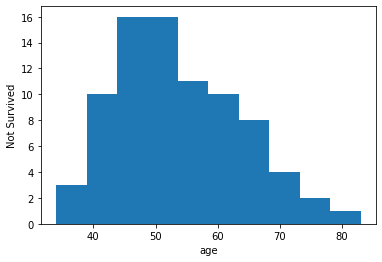

In [8]:
survived_age = df[df['survival_status']==2]['age']

survived_age.plot(kind='hist')
plt.xlabel('age')
plt.ylabel('Not Survived')
plt.show()

> From above graphs it can be said that people who did not survived are mostly belonging to age group of 40 to 60


### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

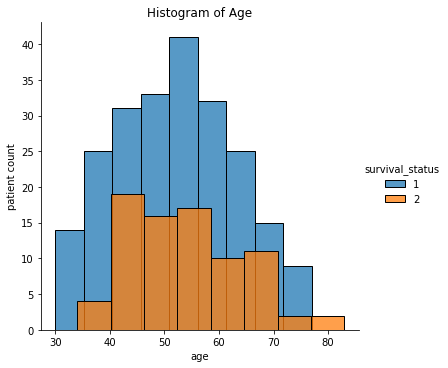

In [20]:
sns.FacetGrid(df, hue="survival_status", size=5) \
   .map(sns.histplot, "age") \
   .add_legend()
plt.title('Histogram of Age')
plt.ylabel('patient count')
plt.show()

> Major Category of patient are from age group 40 - 60 thus middle aged persons are mostly suffered by breast cancer.
> youngsters were found to be successfully completed their surgery whereas people in their octogenerian could not survive the surgery

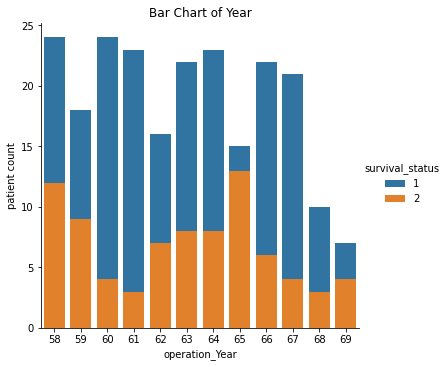

In [39]:
sns.FacetGrid(df, hue="survival_status", size=5) \
   .map(sns.countplot, "operation_Year") \
   .add_legend()
plt.title('Bar Chart of Year')
plt.ylabel('patient count')
plt.show()

# v = df.loc[df['survival_status']==1]['operation_Year'].value_counts()
# v


  > Maximum number of people died in year 65.
  In the year 58, 59 & 69 almost 1/3 patient were insuccessful with their surgery,
  whereas in the year 60, 61, 66 & 67 majority of the patient were survived


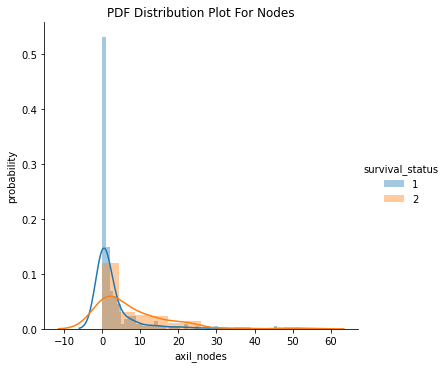

In [45]:
sns.FacetGrid(df, hue="survival_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend()
plt.title('PDF Distribution Plot For Nodes')
plt.ylabel('probability')
plt.show()

# v = df.loc[df['survival_status']==1]['axil_nodes'].value_counts()
# v

> Approximately 50% of Pateints with 0 axil_nodes were having the success rate for Surgery.
  Maximum failure of operation were encountered for patients with axil nodes count in between 0 to 20
  As axile nodes count increases survive rate reduces & failure chances increases

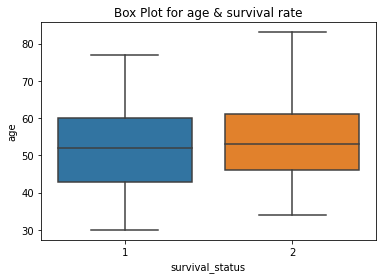

In [57]:
sns.boxplot(x='survival_status',y='age', data=df)
plt.title('Box Plot for age & survival rate')
plt.show()


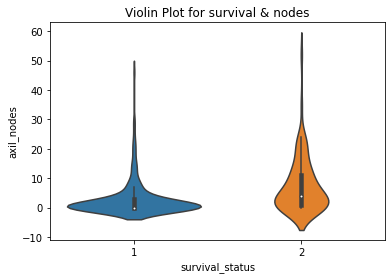

In [58]:
sns.violinplot(x="survival_status", y="axil_nodes", data=df, size=8)
plt.title('Violin Plot for survival & nodes')
plt.show()

> As axil nodes increases from 0 towards 60 chances for surgery failure are also increases slightly

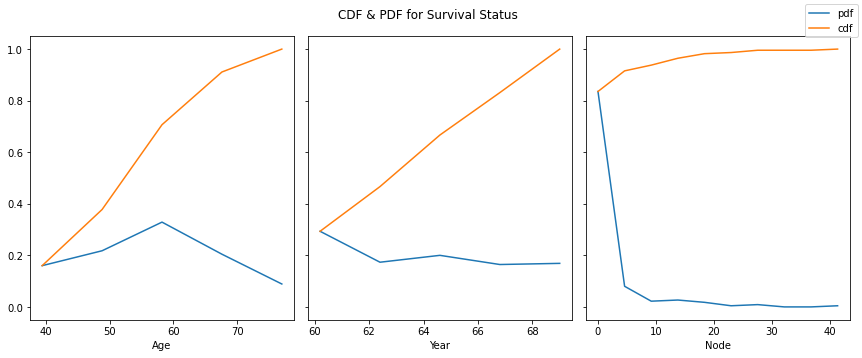

In [103]:
status_survived = df.loc[df['survival_status']==1]
status_death = df.loc[df['survival_status']==2]

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12,5))

fig.suptitle('CDF & PDF for Survival Status')

# Survival Age PDF & CDF
counts, bin_edges = np.histogram(status_survived['age'], bins=5)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
axes[0].plot(bin_edges[1:],pdf)
axes[0].plot(bin_edges[1:], cdf)
axes[0].set_xlabel('Age')

# Survival Operation Year PDF & CDF
counts, bin_edges = np.histogram(status_survived['operation_Year'], bins=5)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
axes[1].plot(bin_edges[1:],pdf)
axes[1].plot(bin_edges[1:], cdf)
axes[1].set_xlabel('Year')

# Survival Axil Nodes PDF & CDF
counts, bin_edges = np.histogram(status_survived['axil_nodes'], bins=10)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
axes[2].plot(bin_edges[0:-1],pdf, label='pdf')
axes[2].plot(bin_edges[0:-1],cdf, label='cdf')
axes[2].set_xlabel('Node')

# for i, f in enumerate(['age', 'operation_Year', 'axil_nodes']):
#     counts, bin_edges = np.histogram(status_survived[f], bins=5)
#     pdf = counts/(sum(counts))
#     cdf = np.cumsum(pdf)
#     axes[i].plot(bin_edges[1:],pdf)
#     axes[i].plot(bin_edges[1:], cdf)
#     axes[i].set_xlabel(f.capitalize())

fig.tight_layout()
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()

- About 80% of Population who survived, were below age of 65
- & 80% of Survivals were having axil node count of 0
  

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


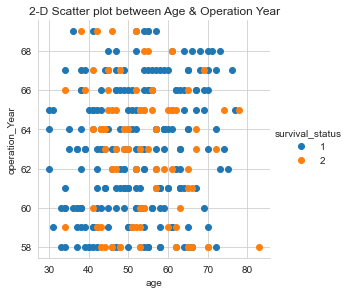

In [112]:
# 2-D Scatter plot
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "operation_Year") \
   .add_legend();
plt.title('2-D Scatter plot between Age & Operation Year')
plt.show();


- Operation In the year 66-68 were successful for Most of the Senior Citizens 
- Also in the period between 60 & 62 most of the operations were successful

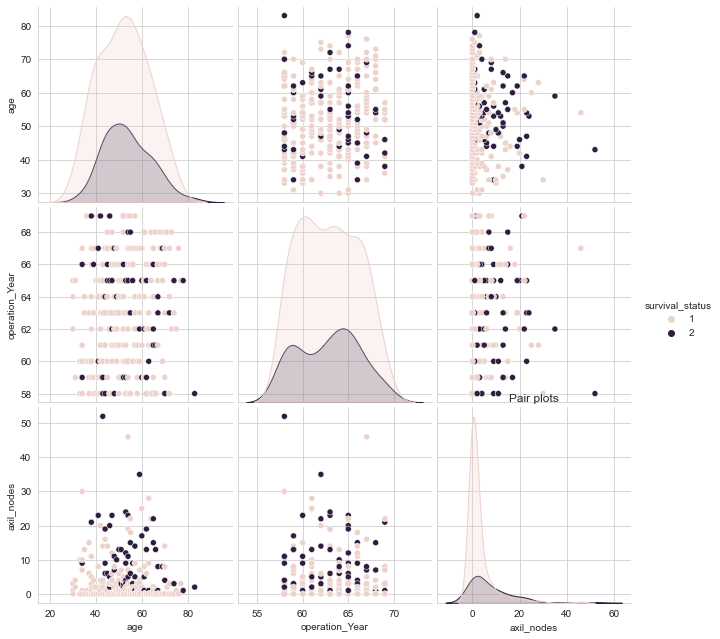

In [115]:
plt.close();
#sns.set_style("");
sns.pairplot(df, hue="survival_status", size=3);
plt.title('Pair plots')
plt.show()

> In the period between 60-62, around 95% of patient survived post operation

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

### Conclusion (Observation)


All in all it can be said that
    Mostly middle aged person belonging to the age group of 40 - 60 were suffered by breast cancer. Although there were Young Patients but most of them survived the operation. Moreover It was observed that 80% of patient who had successful operation were below the age of 65 & also they were having axil counts of 0. To add to this as axil count increases the chances of survival decreases moderately, altogether